In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head(4)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   

  major_discipline  experience company_size company_type  training_hours  \
0             STEM        20.0          NaN          NaN            36.0   
1             STEM        15.0        50-99      Pvt Ltd            47.0   
2             STEM         5.0          NaN          NaN            83.0   
3  Business Degree         0.0          NaN      Pvt Ltd            52.0   

   target  
0     1.0  
1     0.0  
2     0.0  
3     1.0

In [ ]:
df.isnull().mean()*100 
# We do mean all the no of null values 


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [11]:
## 0.05 se kam ho toh 0 se jada toh isme dal de 
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]


# col = []
# for var in df.columns:
#   if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0 :
#     col.append(df[var])

In [12]:
cols
# col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(4)

city_development_index enrolled_university education_level  experience  \
10093                   0.920    Full time course        Graduate         9.0   
3470                    0.920       no_enrollment        Graduate        19.0   
18392                   0.939    Part time course     High School         4.0   
1524                    0.920       no_enrollment  Primary School         8.0   

       training_hours  
10093            34.0  
3470             96.0  
18392             NaN  
1524            110.0

In [14]:
df[cols].isnull().mean()*100

city_development_index    2.500261
enrolled_university       2.014824
education_level           2.401086
experience                0.339284
training_hours            3.998330
dtype: float64

In [17]:
df['education_level'].value_counts()
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [18]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [19]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

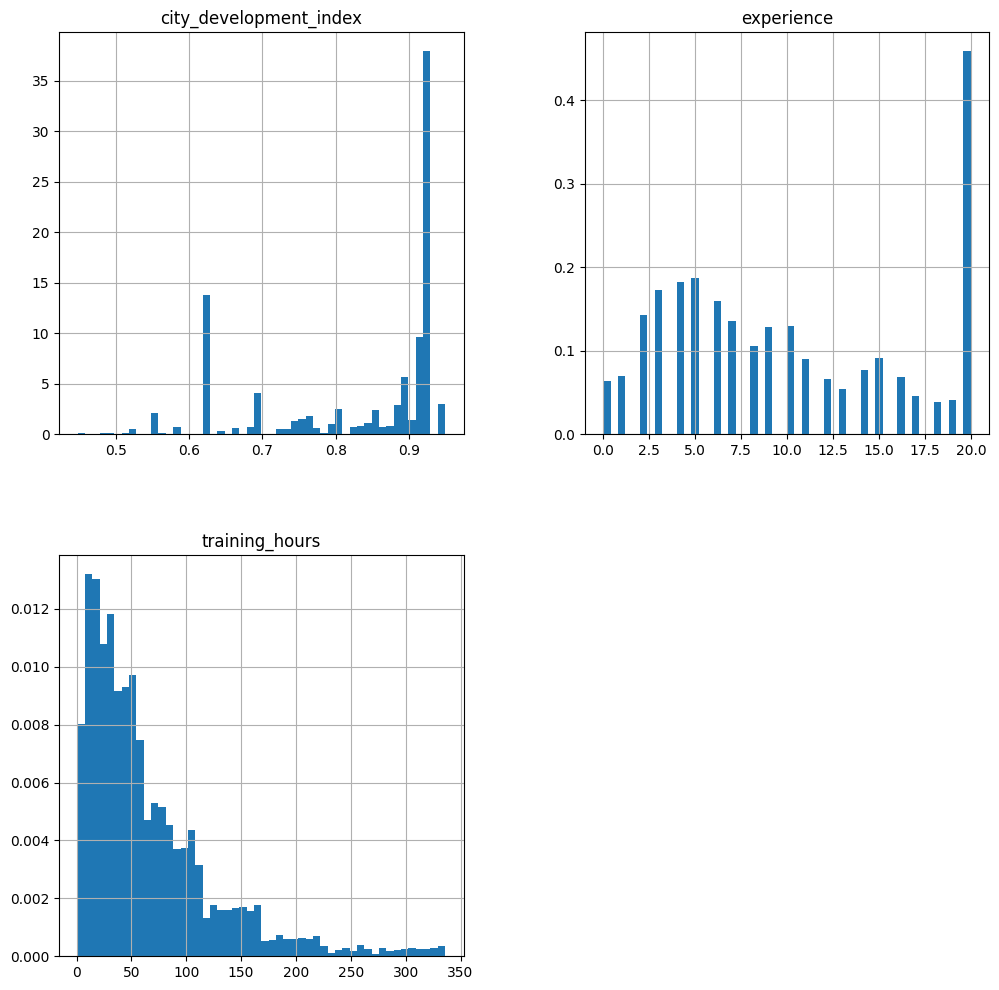

In [20]:
new_df.hist(bins=50,density = True, figsize=(12,12))
plt.show()

<Axes: >

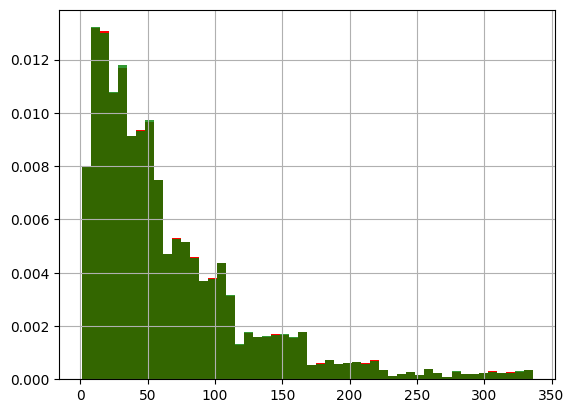

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

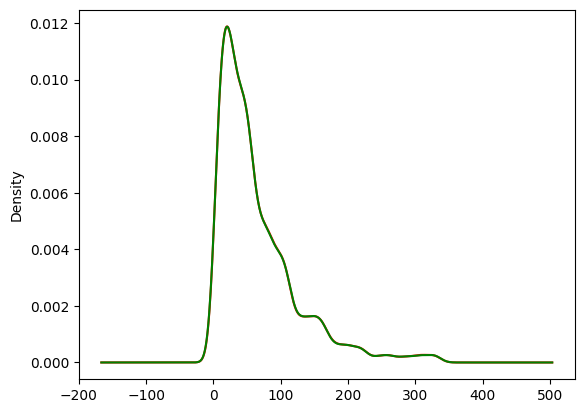

In [23]:
df['training_hours'].plot.density(color = 'red')

new_df['training_hours'].plot.density(color = 'green')

In [24]:
temp = pd.concat([
  df['enrolled_university'].value_counts() / len(df),
  new_df['enrolled_university'].value_counts() / len(new_df)
],axis = 1)
temp.columns = ['original', 'cca']
temp

original       cca
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079